In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.0.3
2.4


In [3]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [19]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.DEBUG)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

In [20]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [21]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [22]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage 0')
ScalarOutcome('A.1_Dike Investment Costs 0')
ScalarOutcome('A.1_Expected Number of Deaths 0')
ScalarOutcome('A.2_Expected Annual Damage 0')
ScalarOutcome('A.2_Dike Investment Costs 0')
ScalarOutcome('A.2_Expected Number of Deaths 0')
ScalarOutcome('A.3_Expected Annual Damage 0')
ScalarOutcome('A.3_Dike Investment Costs 0')
ScalarOutcome('A.3_Expected Number of Deaths 0')
ScalarOutcome('A.4_Expected Annual Damage 0')
ScalarOutcome('A.4_Dike Investment Costs 0')
ScalarOutcome('A.4_Expected Number of Deaths 0')
ScalarOutcome('A.5_Expected Annual Damage 0')
ScalarOutcome('A.5_Dike Investment Costs 0')
ScalarOutcome('A.5_Expected Number of Deaths 0')
ScalarOutcome('RfR Total Costs 0')
ScalarOutcome('Expected Evacuation Costs 0')
ScalarOutcome('A.1_Expected Annual Damage 1')
ScalarOutcome('A.1_Dike Investment Costs 1')
ScalarOutcome('A.1_Expected Number of Deaths 1')
ScalarOutcome('A.2_Expected Annual Damage 1')
ScalarOutcome('A.2_Dike Investment

In [23]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/DEBUG] running scenario 50 for policy 4 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling model_init on AbstractModel
[MainProcess/DEBUG] completed calling model_init on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseMo

[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 3 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected 

[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 5 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProces

[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_E

[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_E

[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_D

[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 65 for policy 4 on model dikesnet
[MainProcess/DEBUG]

[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 67 for policy 4 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel

[MainProcess/DEBUG] running scenario 69 for policy 4 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 20 cases completed
[MainProcess/INFO] 20 cases 

[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 22 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0


[MainProcess/DEBUG] 24 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Co

[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_E

[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expec

[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_D

[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR T

[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 84 for policy 4 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/D

[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 86 for policy 4 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling r

[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 39 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of 

[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 41 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG]

[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_D

[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_E

[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_E

[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scena

[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 53 for policy 5 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[Main

[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 55 for policy 5 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProces

[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 58 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0


[MainProcess/DEBUG] 60 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess

[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_D

[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR T

[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_E

[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_E

[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 70 for policy 5 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProce

[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 72 for policy 5 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_

[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 75 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Inv

[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 77 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG]

[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_D

[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_E

[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_E

[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 87 for policy 5 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEB

[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 89 for policy 5 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on Abstr

[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 92 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Inves

[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 94 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[Main

[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_D

[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_E

[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_E

[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_E

[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 56 for policy 6 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProce

[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 58 for policy 6 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_

[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 111 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike In

[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 113 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG

[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_D

[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_E

[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_E

[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 73 for policy 6 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEB

[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 75 for policy 6 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on Abstr

[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 128 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Inve

[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 130 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[Mai

[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_D

[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_E

[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_E

[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR T

[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 92 for policy 6 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/D

[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 94 for policy 6 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling r

[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 147 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of

[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 149 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5

[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_E

[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_E

[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_D

[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 59 for policy 7 on model dikesnet
[MainProcess/DEBUG]

[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 61 for policy 7 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel

[MainProcess/DEBUG] running scenario 63 for policy 7 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 164 cases completed
[MainProcess/DEBUG] storing

[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 166 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deat

[MainProcess/DEBUG] 168 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation C

[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_E

[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expec

[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_D

[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR T

[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 78 for policy 7 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/D

[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 80 for policy 7 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling r

[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 183 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of

[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 185 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5

[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_E

[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_D

[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_D

[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_E

[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 95 for policy 7 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] c

[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 97 for policy 7 on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on B

[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 200 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[Main

In [15]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage 0', 'Dike Investment Costs 0', 'Expected Number of Deaths 0', 'RfR Total Costs 0', 'Expected Evacuation Costs 0', 'Expected Annual Damage 1', 'Dike Investment Costs 1', 'Expected Number of Deaths 1', 'RfR Total Costs 1', 'Expected Evacuation Costs 1', 'Expected Annual Damage 2', 'Dike Investment Costs 2', 'Expected Number of Deaths 2', 'RfR Total Costs 2', 'Expected Evacuation Costs 2'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,82.0,131.624855,1,0.390465,326.163401,10,0.077415,198.412820,10,0.398861,...,5.0,10.0,10.0,3.0,1.0,3.0,2.0,0,0,dikesnet
1,5.0,239.792818,10,0.490924,114.129557,10,0.296649,155.928418,10,0.605872,...,5.0,10.0,10.0,3.0,1.0,3.0,2.0,1,0,dikesnet
2,74.0,310.872079,1.5,0.628260,300.908360,10,0.387152,287.731516,1,0.854223,...,5.0,10.0,10.0,3.0,1.0,3.0,2.0,2,0,dikesnet
3,95.0,274.959553,1,0.102117,254.621738,1,0.934345,36.902731,10,0.804252,...,5.0,10.0,10.0,3.0,1.0,3.0,2.0,3,0,dikesnet
4,78.0,234.534789,1.5,0.987778,153.283942,1.5,0.431589,64.130201,1.5,0.401920,...,5.0,10.0,10.0,3.0,1.0,3.0,2.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,111.0,144.179234,10,0.791609,49.406231,1,0.149557,331.119266,10,0.051321,...,8.0,4.0,1.0,9.0,5.0,2.0,4.0,45,3,dikesnet
196,73.0,138.072749,10,0.066780,83.330866,1.5,0.331510,119.125908,1.5,0.219716,...,8.0,4.0,1.0,9.0,5.0,2.0,4.0,46,3,dikesnet
197,18.0,163.288681,1.5,0.132678,240.713227,1.5,0.689976,229.992764,10,0.350147,...,8.0,4.0,1.0,9.0,5.0,2.0,4.0,47,3,dikesnet
198,11.0,67.437950,1.5,0.855470,343.476861,1.5,0.668371,272.455444,1,0.556448,...,8.0,4.0,1.0,9.0,5.0,2.0,4.0,48,3,dikesnet


In [30]:
len(outcomes.keys())

51

In [25]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

nopolicy = [Policy('no policy', **{'0_RfR 0':0,
                                    '0_RfR 1':0,
                                    '0_RfR 2':0,
                                    '1_RfR 0':0,
                                    '1_RfR 1':0,
                                    '1_RfR 2':0,
                                    '2_RfR 0':0,
                                    '2_RfR 1':0,
                                    '2_RfR 2':0,
                                    '3_RfR 0':0,
                                    '3_RfR 1':0,
                                    '3_RfR 2':0,
                                    '4_RfR 0':0,
                                    '4_RfR 1':0,
                                    '4_RfR 2':0,
                                    'A.1_DikeIncrease 0':0,
                                    'A.1_DikeIncrease 1':0,
                                    'A.1_DikeIncrease 2':0,
                                    'A.2_DikeIncrease 0':0,
                                    'A.2_DikeIncrease 1':0,
                                    'A.2_DikeIncrease 2':0,
                                    'A.3_DikeIncrease 0':0,
                                    'A.3_DikeIncrease 1':0,
                                    'A.3_DikeIncrease 2':0,
                                    'A.4_DikeIncrease 0':0,
                                    'A.4_DikeIncrease 1':0,
                                    'A.4_DikeIncrease 2':0,
                                    'A.5_DikeIncrease 0':0,
                                    'A.5_DikeIncrease 1':0,
                                    'A.5_DikeIncrease 2':0,
                                    'EWS_DaysToThreat':0})]

In [26]:
#running the model through EMA workbench
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100, policies=nopolicy)

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/DEBUG] running scenario 100 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling model_init on AbstractModel
[MainProcess/DEBUG] completed calling model_init on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment

[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 3 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected 

[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 5 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DE

[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_E

[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_D

[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_E

[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_E

[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expec

[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 117 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractMo

[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 119 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] com

[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 22 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of 

[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 24 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG]

[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_D

[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_E

[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_E

[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 134 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainPr

[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 136 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model

[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 39 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Inves

[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 41 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Death

[MainProcess/DEBUG] 43 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Co

[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_D

[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR T

[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_E

[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_D

[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 153 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess

[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 155 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_

[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 58 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected

[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 60 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_

[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_D

[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_E

[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_E

[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR T

[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 172 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[Main

[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 174 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] 

[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 77 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of 

[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 79 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG]

[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_E

[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_E

[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_E

[MainProcess/DEBUG] storing A.4_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 1
[MainProcess/DEBUG] storing RfR Total Costs 1
[MainProcess/DEBUG] storing Expected Evacuation Costs 1
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_D

[MainProcess/DEBUG] storing A.1_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 189 for policy no policy on model dikesnet
[MainProce

[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 2
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 2
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 2
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 2
[MainProcess/DEBUG] storing RfR Total Costs 2
[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 191 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractMo

[MainProcess/DEBUG] storing Expected Evacuation Costs 2
[MainProcess/DEBUG] running scenario 193 for policy no policy on model dikesnet
[MainProcess/DEBUG] calling run_model on SingleReplication
[MainProcess/DEBUG] calling run_model on AbstractModel
[MainProcess/DEBUG] calling initialized on AbstractModel
[MainProcess/DEBUG] completed calling initialized on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[M

[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling _transform on AbstractModel
[MainProcess/DEBUG] completed calling run_model on AbstractModel
[MainProcess/DEBUG] calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_experiment on BaseModel
[MainProcess/DEBUG] completed calling run_model on SingleReplication
[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 96 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual

[MainProcess/DEBUG] calling reset_model on AbstractModel
[MainProcess/DEBUG] completed calling reset_model on AbstractModel
[MainProcess/DEBUG] 98 cases completed
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_

[MainProcess/DEBUG] storing A.2_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.2_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.3_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.3_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.3_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.4_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.4_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.4_Expected Number of Deaths 0
[MainProcess/DEBUG] storing A.5_Expected Annual Damage 0
[MainProcess/DEBUG] storing A.5_Dike Investment Costs 0
[MainProcess/DEBUG] storing A.5_Expected Number of Deaths 0
[MainProcess/DEBUG] storing RfR Total Costs 0
[MainProcess/DEBUG] storing Expected Evacuation Costs 0
[MainProcess/DEBUG] storing A.1_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.1_Dike Investment Costs 1
[MainProcess/DEBUG] storing A.1_Expected Number of Deaths 1
[MainProcess/DEBUG] storing A.2_Expected Annual Damage 1
[MainProcess/DEBUG] storing A.2_D

In [27]:
experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)

In [28]:
outcomes

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,8.904748e+08,0,0.568936,7.926304e+05,0,0.000702,0.000000e+00,0,0.000000,0.000000e+00,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
1,0.000000e+00,0,0.000000,6.563363e+06,0,0.006192,2.566441e+07,0,0.045235,0.000000e+00,...,0,0.045235,0.000000e+00,0,0.000000,7.495184e+07,0,0.082030,0.0,0.0
2,5.798499e+08,0,0.566774,1.024394e+07,0,0.012674,0.000000e+00,0,0.000000,1.753270e+05,...,0,0.000000,3.481556e+05,0,0.000096,0.000000e+00,0,0.000000,0.0,0.0
3,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,6.391763e+08,0,0.814552,0.000000e+00,...,0,0.814552,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
4,7.076170e+08,0,0.567137,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,3.283872e+06,...,0,0.000000,3.283872e+06,0,0.001687,0.000000e+00,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.827127e+08,0,0.281840,1.940150e+08,0,0.242863,0.000000e+00,0,0.000000,0.000000e+00,...,0,0.000000,0.000000e+00,0,0.000000,3.284004e+07,0,0.021464,0.0,0.0
96,6.561033e+07,0,0.044841,0.000000e+00,0,0.000000,6.573113e+06,0,0.011707,1.849100e+07,...,0,0.011707,1.849100e+07,0,0.008566,0.000000e+00,0,0.000000,0.0,0.0
97,6.440253e+07,0,0.033988,6.330793e+06,0,0.004532,6.341807e+08,0,0.804651,0.000000e+00,...,0,0.804651,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
98,1.215441e+07,0,0.012860,4.739960e+07,0,0.063961,0.000000e+00,0,0.000000,0.000000e+00,...,0,0.000000,0.000000e+00,0,0.000000,7.479276e+06,0,0.006595,0.0,0.0


In [29]:
outcomes.keys()

Index(['A.1_Expected Annual Damage 0', 'A.1_Dike Investment Costs 0',
       'A.1_Expected Number of Deaths 0', 'A.2_Expected Annual Damage 0',
       'A.2_Dike Investment Costs 0', 'A.2_Expected Number of Deaths 0',
       'A.3_Expected Annual Damage 0', 'A.3_Dike Investment Costs 0',
       'A.3_Expected Number of Deaths 0', 'A.4_Expected Annual Damage 0',
       'A.4_Dike Investment Costs 0', 'A.4_Expected Number of Deaths 0',
       'A.5_Expected Annual Damage 0', 'A.5_Dike Investment Costs 0',
       'A.5_Expected Number of Deaths 0', 'RfR Total Costs 0',
       'Expected Evacuation Costs 0', 'A.1_Expected Annual Damage 1',
       'A.1_Dike Investment Costs 1', 'A.1_Expected Number of Deaths 1',
       'A.2_Expected Annual Damage 1', 'A.2_Dike Investment Costs 1',
       'A.2_Expected Number of Deaths 1', 'A.3_Expected Annual Damage 1',
       'A.3_Dike Investment Costs 1', 'A.3_Expected Number of Deaths 1',
       'A.4_Expected Annual Damage 1', 'A.4_Dike Investment Costs 1',
   

In [35]:
ead = outcomes.filter(regex='Damage')
invcost = outcomes.filter(regex='Investment')
death = outcomes.filter(regex='Death')
invcost
ead
death

,A.1_Expected Number of Deaths 0,A.2_Expected Number of Deaths 0,A.3_Expected Number of Deaths 0,A.4_Expected Number of Deaths 0,A.5_Expected Number of Deaths 0,A.1_Expected Number of Deaths 1,A.2_Expected Number of Deaths 1,A.3_Expected Number of Deaths 1,A.4_Expected Number of Deaths 1,A.5_Expected Number of Deaths 1,A.1_Expected Number of Deaths 2,A.2_Expected Number of Deaths 2,A.3_Expected Number of Deaths 2,A.4_Expected Number of Deaths 2,A.5_Expected Number of Deaths 2
0,0.568936,0.000702,0.000000,0.000000,0.000000,0.568936,0.000702,0.000000,0.000000,0.000000,0.568936,0.000702,0.000000,0.000000,0.000000
1,0.000000,0.006192,0.045235,0.000000,0.082030,0.000000,0.006192,0.045235,0.000000,0.082030,0.000000,0.006192,0.045235,0.000000,0.082030
2,0.566774,0.012674,0.000000,0.000096,0.000000,0.566774,0.012674,0.000000,0.000096,0.000000,0.566774,0.012674,0.000000,0.000096,0.000000
3,0.000000,0.000000,0.814552,0.000000,0.000000,0.000000,0.000000,0.814552,0.000000,0.000000,0.000000,0.000000,0.814552,0.000000,0.000000
4,0.567137,0.000000,0.000000,0.001687,0.000000,0.567137,0.000000,0.000000,0.001687,0.000000,0.567137,0.000000,0.000000,0.001687,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.281840,0.242863,0.000000,0.000000,0.021464,0.281840,0.242863,0.000000,0.000000,0.021464,0.281840,0.242863,0.000000,0.000000,0.021464
96,0.044841,0.000000,0.011707,0.008566,0.000000,0.044841,0.000000,0.011707,0.008566,0.000000,0.044841,0.000000,0.011707,0.008566,0.000000
97,0.033988,0.004532,0.804651,0.000000,0.000000,0.033988,0.004532,0.804651,0.000000,0.000000,0.033988,0.004532,0.804651,0.000000,0.000000
98,0.012860,0.063961,0.000000,0.000000,0.006595,0.012860,0.063961,0.000000,0.000000,0.006595,0.012860,0.063961,0.000000,0.000000,0.006595


In [38]:
eadA1=ead.filter(regex='A.1')
eadA2=ead.filter(regex='A.2')
eadA3=ead.filter(regex='A.3')
eadA4=ead.filter(regex='A.4')
eadA5=ead.filter(regex='A.5')
ead['EAD A1']=eadA1.sum(axis=1)
ead['EAD A2']=eadA2.sum(axis=1)
ead['EAD A3']=eadA3.sum(axis=1)
ead['EAD A4']=eadA4.sum(axis=1)
ead['EAD A5']=eadA5.sum(axis=1)

ead

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,A.1_Expected Annual Damage 0,A.2_Expected Annual Damage 0,A.3_Expected Annual Damage 0,A.4_Expected Annual Damage 0,A.5_Expected Annual Damage 0,A.1_Expected Annual Damage 1,A.2_Expected Annual Damage 1,A.3_Expected Annual Damage 1,A.4_Expected Annual Damage 1,A.5_Expected Annual Damage 1,A.1_Expected Annual Damage 2,A.2_Expected Annual Damage 2,A.3_Expected Annual Damage 2,A.4_Expected Annual Damage 2,A.5_Expected Annual Damage 2,EAD A1,EAD A2,EAD A3,EAD A4,EAD A5
0,8.904748e+08,7.926304e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.154942e+09,1.028038e+06,0.000000e+00,0.000000e+00,0.000000e+00,7.094077e+08,6.314588e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.754824e+09,2.452127e+06,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,6.563363e+06,2.566441e+07,0.000000e+00,9.408232e+07,0.000000e+00,6.563363e+06,2.566441e+07,0.000000e+00,9.408232e+07,0.000000e+00,5.228785e+06,2.044587e+07,0.000000e+00,7.495184e+07,0.000000e+00,1.835551e+07,7.177470e+07,0.000000e+00,2.631165e+08
2,5.798499e+08,1.024394e+07,0.000000e+00,1.753270e+05,0.000000e+00,1.151437e+09,2.034190e+07,0.000000e+00,3.481556e+05,0.000000e+00,1.151437e+09,2.034190e+07,0.000000e+00,3.481556e+05,0.000000e+00,2.882723e+09,5.092775e+07,0.000000e+00,8.716381e+05,0.000000e+00
3,0.000000e+00,0.000000e+00,6.391763e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.218816e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.218816e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.282939e+09,0.000000e+00,0.000000e+00
4,7.076170e+08,0.000000e+00,0.000000e+00,3.283872e+06,0.000000e+00,5.801469e+08,0.000000e+00,0.000000e+00,2.692315e+06,0.000000e+00,7.076170e+08,0.000000e+00,0.000000e+00,3.283872e+06,0.000000e+00,1.995381e+09,0.000000e+00,0.000000e+00,9.260058e+06,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.827127e+08,1.940150e+08,0.000000e+00,0.000000e+00,1.653785e+07,2.827127e+08,1.940150e+08,0.000000e+00,0.000000e+00,1.653785e+07,5.613967e+08,3.852652e+08,0.000000e+00,0.000000e+00,3.284004e+07,1.126822e+09,7.732952e+08,0.000000e+00,0.000000e+00,6.591575e+07
96,6.561033e+07,0.000000e+00,6.573113e+06,1.849100e+07,0.000000e+00,5.226928e+07,0.000000e+00,5.236552e+06,1.473108e+07,0.000000e+00,6.561033e+07,0.000000e+00,6.573113e+06,1.849100e+07,0.000000e+00,1.834899e+08,0.000000e+00,1.838278e+07,5.171308e+07,0.000000e+00
97,6.440253e+07,6.330793e+06,6.341807e+08,0.000000e+00,0.000000e+00,4.965517e+07,4.881122e+06,4.889614e+08,0.000000e+00,0.000000e+00,3.955840e+07,3.888606e+06,3.895371e+08,0.000000e+00,0.000000e+00,1.536161e+08,1.510052e+07,1.512679e+09,0.000000e+00,0.000000e+00
98,1.215441e+07,4.739960e+07,0.000000e+00,0.000000e+00,4.885101e+06,1.215441e+07,4.739960e+07,0.000000e+00,0.000000e+00,4.885101e+06,1.860887e+07,7.257060e+07,0.000000e+00,0.000000e+00,7.479276e+06,4.291769e+07,1.673698e+08,0.000000e+00,0.000000e+00,1.724948e+07


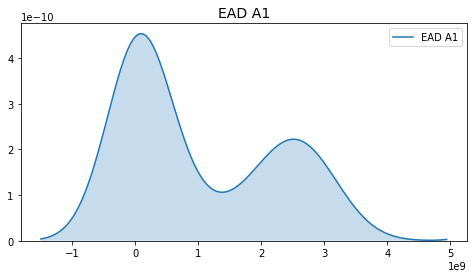

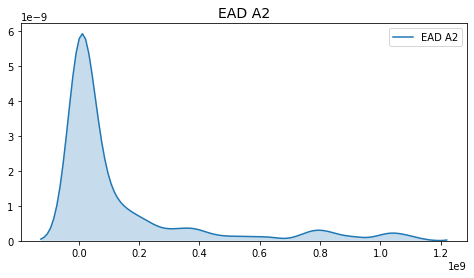

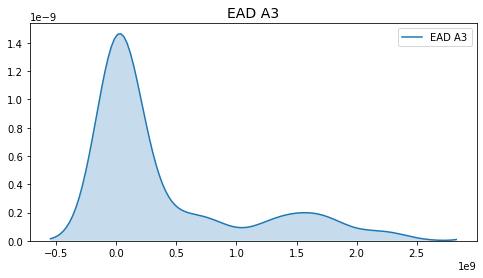

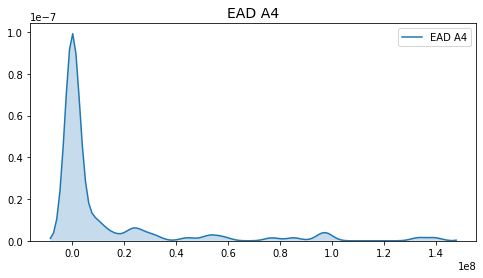

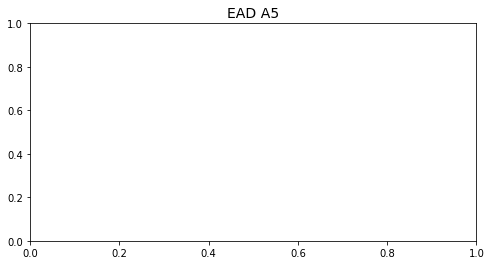

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axA1 = plt.subplots(figsize=(8,4))
axA1.set_title('EAD A1', size=14)
fig, axA2 = plt.subplots(figsize=(8,4))
axA2.set_title('EAD A2', size=14)
fig, axA3 = plt.subplots(figsize=(8,4))
axA3.set_title('EAD A3', size=14)
fig, axA4 = plt.subplots(figsize=(8,4))
axA4.set_title('EAD A4', size=14)
fig, axA5 = plt.subplots(figsize=(8,4))
axA5.set_title('EAD A5', size=14)
#axrel.set_title('reliability', size=14)
#axutil.set_title('utility', size=14)

sns.kdeplot(ead['EAD A1'], ax=axA1, shade=True)
sns.kdeplot(ead['EAD A2'], ax=axA2, shade=True)
sns.kdeplot(ead['EAD A3'], ax=axA3, shade=True)
sns.kdeplot(ead['EAD A4'], ax=axA4, shade=True)
#sns.kdeplot(ead['EAD A5'], ax=axA5, shade=True)

#sns.kdeplot(ead['EAD A5'], ax=axA4, shade=True, Label='A5')

plt.show()

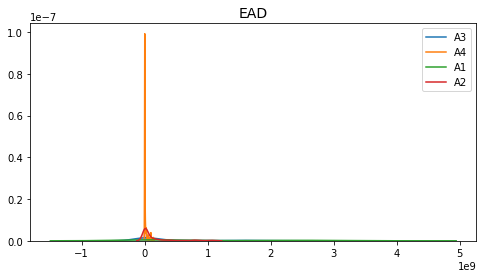

In [43]:
fig, axA4 = plt.subplots(figsize=(8,4))
axA4.set_title('EAD', size=14)
#axrel.set_title('reliability', size=14)
#axutil.set_title('utility', size=14)

sns.kdeplot(ead['EAD A3'], ax=axA4, shade=True, Label='A3')
sns.kdeplot(ead['EAD A4'], ax=axA4, shade=True, Label='A4')
sns.kdeplot(ead['EAD A1'], ax=axA4, shade=True, Label='A1')
sns.kdeplot(ead['EAD A2'], ax=axA4, shade=True, Label='A2')
#sns.kdeplot(ead['EAD A5'], ax=axA4, shade=True, Label='A5')

plt.show()

In [48]:
print(sum(ead['EAD A1'])/1000000)
print(sum(ead['EAD A2'])/1000000)
print(sum(ead['EAD A3'])/1000000)
print(sum(ead['EAD A4'])/1000000)
print(sum(ead['EAD A5'])/1000000)

102189.2444315303
14115.112026276609
38973.191183393974
1239.4273338071682
6802.619820730771


In [49]:
print(sum(ead['EAD A1'])/100)
print(sum(ead['EAD A2'])/100)
print(sum(ead['EAD A3'])/100)
print(sum(ead['EAD A4'])/100)
print(sum(ead['EAD A5'])/100)

1021892444.3153031
141151120.2627661
389731911.83393973
12394273.338071682
68026198.20730771


In [53]:
death = outcomes.filter(regex='Death')
deathA1=death.filter(regex='A.1')
deathA2=death.filter(regex='A.2')
deathA3=death.filter(regex='A.3')
deathA4=death.filter(regex='A.4')
deathA5=death.filter(regex='A.5')
death['Death A1']=deathA1.sum(axis=1)
death['Death A2']=deathA2.sum(axis=1)
death['Death A3']=deathA3.sum(axis=1)
death['Death A4']=deathA4.sum(axis=1)
death['Death A5']=deathA5.sum(axis=1)

death

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,A.1_Expected Number of Deaths 0,A.2_Expected Number of Deaths 0,A.3_Expected Number of Deaths 0,A.4_Expected Number of Deaths 0,A.5_Expected Number of Deaths 0,A.1_Expected Number of Deaths 1,A.2_Expected Number of Deaths 1,A.3_Expected Number of Deaths 1,A.4_Expected Number of Deaths 1,A.5_Expected Number of Deaths 1,A.1_Expected Number of Deaths 2,A.2_Expected Number of Deaths 2,A.3_Expected Number of Deaths 2,A.4_Expected Number of Deaths 2,A.5_Expected Number of Deaths 2,Death A1,Death A2,Death A3,Death A4,Death A5
0,0.568936,0.000702,0.000000,0.000000,0.000000,0.568936,0.000702,0.000000,0.000000,0.000000,0.568936,0.000702,0.000000,0.000000,0.000000,1.706807,0.002105,0.000000,0.000000,0.000000
1,0.000000,0.006192,0.045235,0.000000,0.082030,0.000000,0.006192,0.045235,0.000000,0.082030,0.000000,0.006192,0.045235,0.000000,0.082030,0.000000,0.018575,0.135704,0.000000,0.246090
2,0.566774,0.012674,0.000000,0.000096,0.000000,0.566774,0.012674,0.000000,0.000096,0.000000,0.566774,0.012674,0.000000,0.000096,0.000000,1.700321,0.038022,0.000000,0.000287,0.000000
3,0.000000,0.000000,0.814552,0.000000,0.000000,0.000000,0.000000,0.814552,0.000000,0.000000,0.000000,0.000000,0.814552,0.000000,0.000000,0.000000,0.000000,2.443655,0.000000,0.000000
4,0.567137,0.000000,0.000000,0.001687,0.000000,0.567137,0.000000,0.000000,0.001687,0.000000,0.567137,0.000000,0.000000,0.001687,0.000000,1.701412,0.000000,0.000000,0.005061,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.281840,0.242863,0.000000,0.000000,0.021464,0.281840,0.242863,0.000000,0.000000,0.021464,0.281840,0.242863,0.000000,0.000000,0.021464,0.845520,0.728590,0.000000,0.000000,0.064391
96,0.044841,0.000000,0.011707,0.008566,0.000000,0.044841,0.000000,0.011707,0.008566,0.000000,0.044841,0.000000,0.011707,0.008566,0.000000,0.134524,0.000000,0.035121,0.025698,0.000000
97,0.033988,0.004532,0.804651,0.000000,0.000000,0.033988,0.004532,0.804651,0.000000,0.000000,0.033988,0.004532,0.804651,0.000000,0.000000,0.101963,0.013595,2.413953,0.000000,0.000000
98,0.012860,0.063961,0.000000,0.000000,0.006595,0.012860,0.063961,0.000000,0.000000,0.006595,0.012860,0.063961,0.000000,0.000000,0.006595,0.038581,0.191882,0.000000,0.000000,0.019784


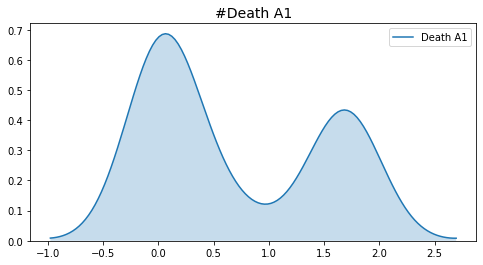

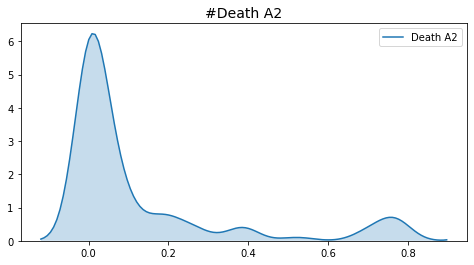

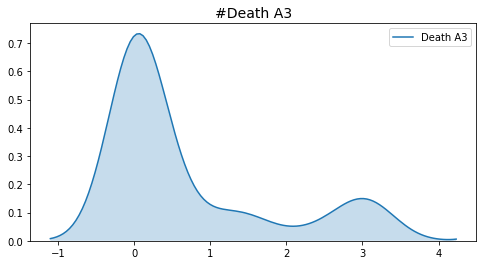

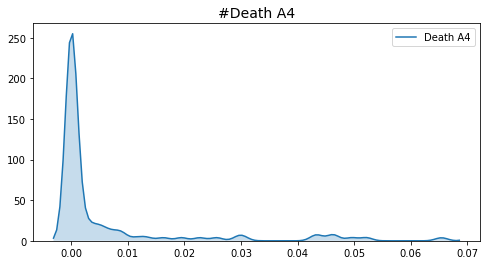

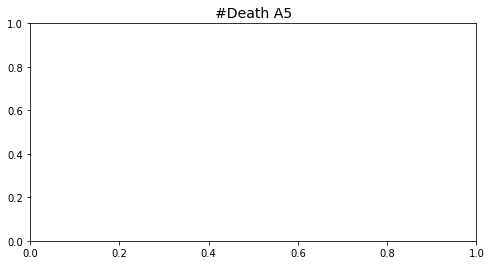

In [56]:
fig, axA1 = plt.subplots(figsize=(8,4))
axA1.set_title('#Death A1', size=14)
fig, axA2 = plt.subplots(figsize=(8,4))
axA2.set_title('#Death A2', size=14)
fig, axA3 = plt.subplots(figsize=(8,4))
axA3.set_title('#Death A3', size=14)
fig, axA4 = plt.subplots(figsize=(8,4))
axA4.set_title('#Death A4', size=14)
fig, axA5 = plt.subplots(figsize=(8,4))
axA5.set_title('#Death A5', size=14)


sns.kdeplot(death['Death A1'], ax=axA1, shade=True)
sns.kdeplot(death['Death A2'], ax=axA2, shade=True)
sns.kdeplot(death['Death A3'], ax=axA3, shade=True)
sns.kdeplot(death['Death A4'], ax=axA4, shade=True)
#sns.kdeplot(death['Death A5'], ax=axA5, shade=True)


plt.show()

In [58]:
print(sum(death['Death A1']))
print(sum(death['Death A2']))
print(sum(death['Death A3']))
print(sum(death['Death A4']))
print(sum(death['Death A5']))

68.68770908247745
12.686614067319585
68.31558654285399
0.5955095835969493
6.025743765385646
